In [1]:
%matplotlib agg
import itertools
import multiprocessing
import networkx as nx
from proteins.dataset import ProteinQualityDataset, RemoveEdges
import pandas as pd
from tqdm import tqdm
import torchgraphs
import torch
from torch_scatter import scatter_mean, scatter_max
from torch.utils.data import DataLoader
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

In [2]:
df_data = pd.read_csv('../data/CASP11/samples.csv')
df_data.path = ['../data/CASP11/' + p for p in df_data['path']]
print(f'Num targets: {df_data.target.nunique()}')
print(f'Num models: {len(df_data)}')

Num targets: 85
Num models: 16094


100%|██████████| 3219/3219 [00:10<00:00, 307.63it/s]


,Nodes
count,16094.00
mean,260.99
std,133.32
min,44.00
25%,140.00
50%,255.00
75%,369.00
max,669.00


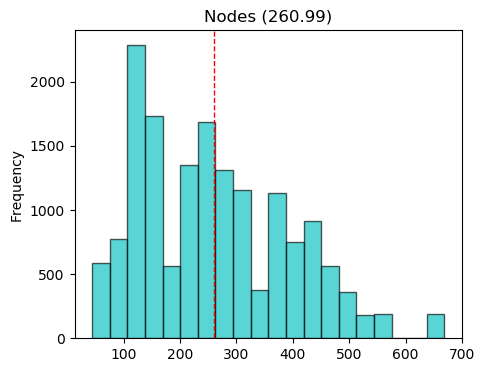

In [3]:
ds = ProteinQualityDataset(df_data)
dl = DataLoader(ds, batch_size=5, num_workers=0, shuffle=False, collate_fn=torchgraphs.GraphBatch.collate)

all_nodes = []
for _, _, proteins, _ in tqdm(dl, leave=True):
    all_nodes.append(proteins.num_nodes_by_graph)
    
all_nodes = pd.Series(np.concatenate(all_nodes))
display(all_nodes.describe().to_frame('Nodes').round(2))
            
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
all_nodes.plot.hist(ax=ax, bins=20, color='c', edgecolor='k', alpha=0.65, title=f'Nodes ({all_nodes.mean():.2f})')
ax.axvline(all_nodes.mean(), color='r', linestyle='dashed', linewidth=1)

display(fig)
plt.close(fig)
del all_nodes

In [4]:
df_data = df_data.groupby('target').head(20)
print(f'Num targets: {df_data.target.nunique()}')
print(f'Num models: {len(df_data)}')

Num targets: 85
Num models: 1700


## Cutoff 0

100%|██████████| 340/340 [05:20<00:00,  1.99s/it]


,edges,avg_degree,max_degree,avg_path,max_path
count,1700.00,1700.00,1700.0,1700.00,1700.00
mean,523.39,1.99,2.0,87.56,261.69
std,267.43,0.01,0.0,44.57,133.72
min,86.00,1.95,2.0,14.66,43.00
25%,302.00,1.99,2.0,50.66,151.00
50%,508.00,1.99,2.0,85.00,254.00
75%,736.00,1.99,2.0,123.00,368.00
max,1336.00,2.00,2.0,223.00,668.00


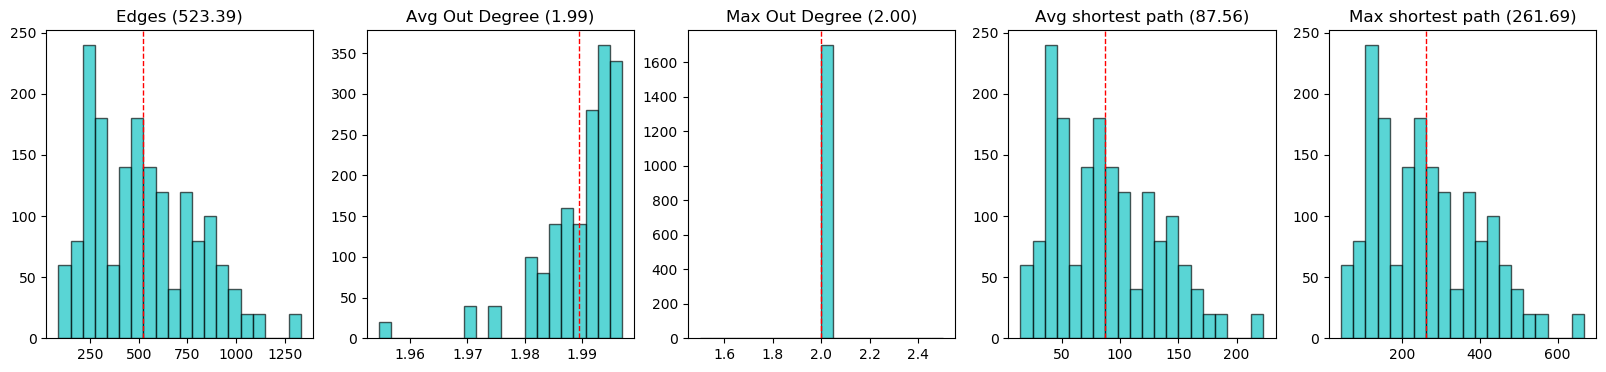

## Cutoff 6

100%|██████████| 340/340 [07:28<00:00,  3.00s/it]


,edges,avg_degree,max_degree,avg_path,max_path
count,1700.00,1700.00,1700.00,1700.00,1700.00
mean,1176.06,4.41,9.01,10.18,31.40
std,644.28,0.51,1.26,12.67,39.28
min,138.00,2.20,4.00,3.41,7.00
25%,621.50,4.15,8.00,5.86,15.00
50%,1080.00,4.46,9.00,7.25,20.00
75%,1616.50,4.76,10.00,9.58,31.00
max,4120.00,7.17,17.00,177.31,480.00


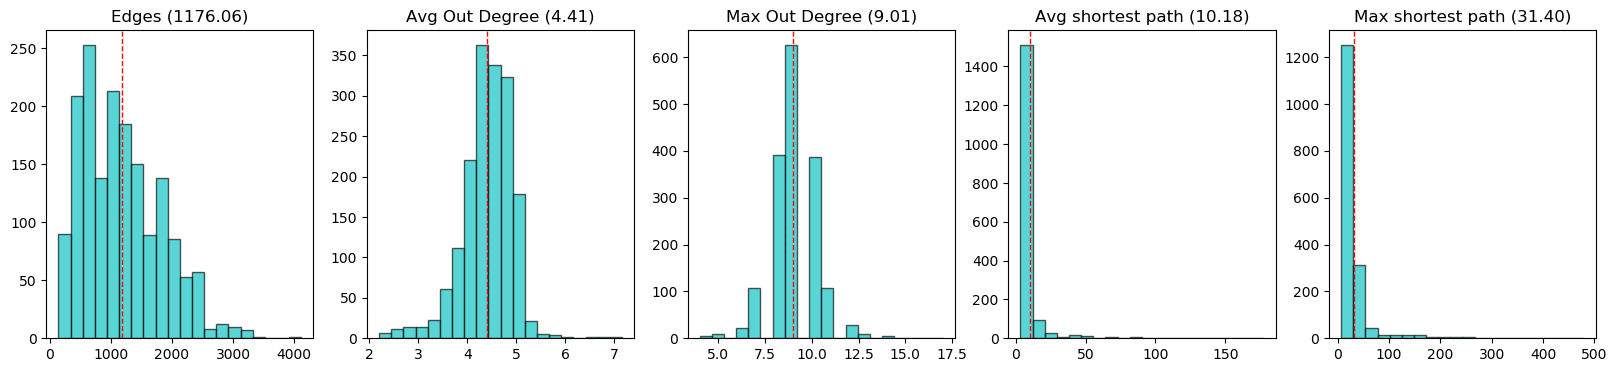

## Cutoff 8

100%|██████████| 340/340 [11:18<00:00,  4.57s/it]


,edges,avg_degree,max_degree,avg_path,max_path
count,1700.00,1700.00,1700.00,1700.00,1700.00
mean,2505.09,9.36,17.43,7.16,22.08
std,1407.55,1.31,2.36,11.11,34.18
min,288.00,2.56,8.00,2.56,5.00
25%,1289.00,8.82,16.00,4.02,10.00
50%,2310.00,9.56,17.00,4.92,13.00
75%,3464.00,10.21,18.00,6.44,20.00
max,9264.00,16.11,33.00,176.99,479.00


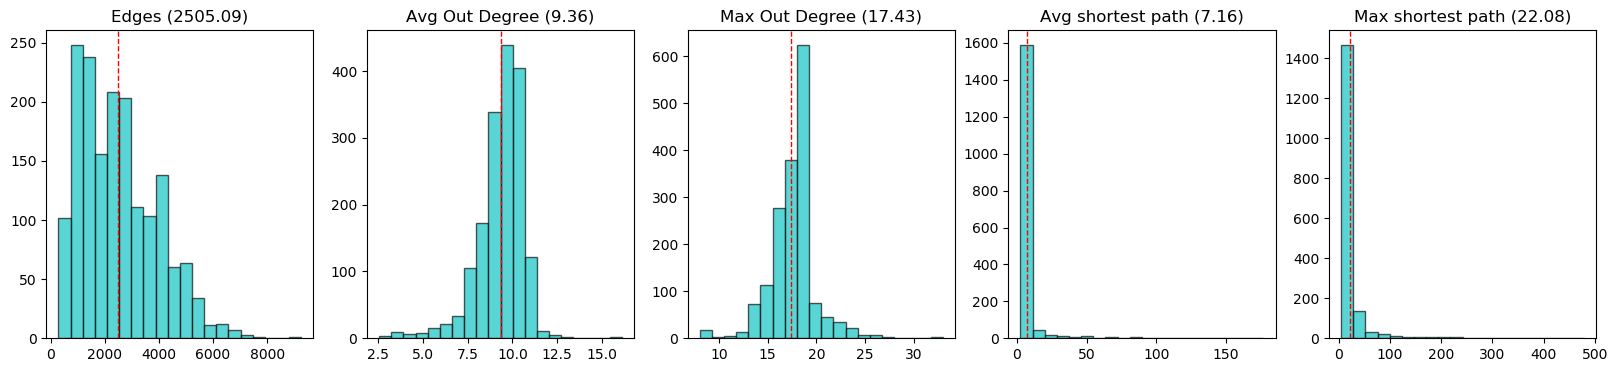

## Cutoff 10

100%|██████████| 340/340 [16:54<00:00,  7.34s/it]


,edges,avg_degree,max_degree,avg_path,max_path
count,1700.00,1700.00,1700.00,1700.00,1700.00
mean,4294.61,15.84,29.71,5.90,18.43
std,2531.76,2.82,4.77,10.97,33.64
min,344.00,2.99,10.00,2.01,4.00
25%,2143.50,14.56,27.00,3.10,7.00
50%,3865.00,16.21,30.00,3.73,10.00
75%,5860.00,17.78,32.00,4.82,15.00
max,17394.00,30.25,58.00,176.80,477.00


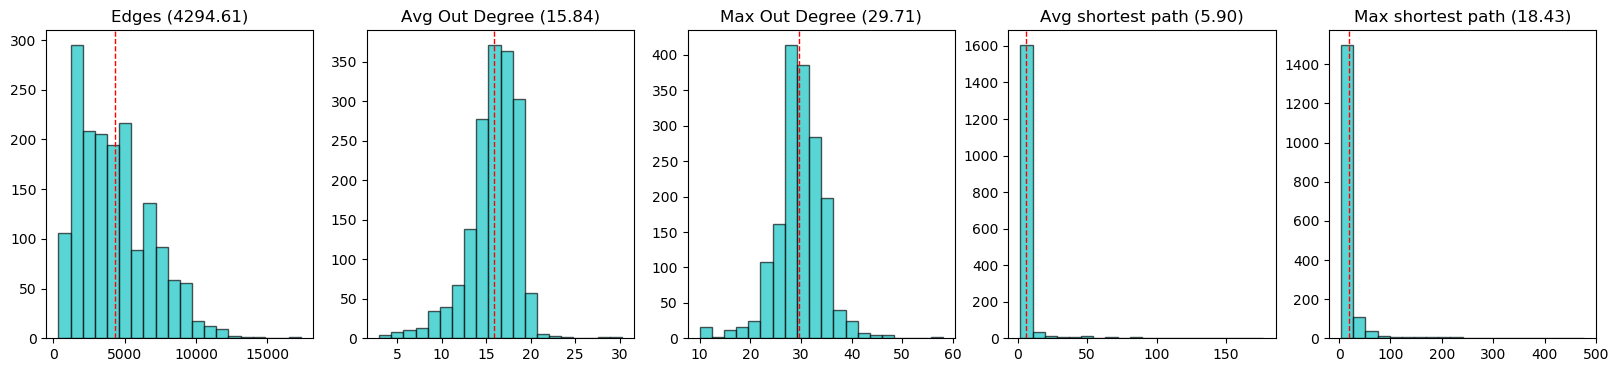

## Cutoff 12

100%|██████████| 340/340 [25:44<00:00, 11.99s/it]


,edges,avg_degree,max_degree,avg_path,max_path
count,1700.00,1700.00,1700.00,1700.00,1700.00
mean,6990.98,25.58,47.86,5.03,15.85
std,4233.58,5.03,7.97,10.75,32.99
min,470.00,3.45,14.00,1.68,3.00
25%,3345.50,23.39,44.00,2.52,6.00
50%,6263.00,26.38,49.00,3.03,8.00
75%,9617.50,29.05,53.00,3.88,12.00
max,28556.00,49.66,95.00,176.68,477.00


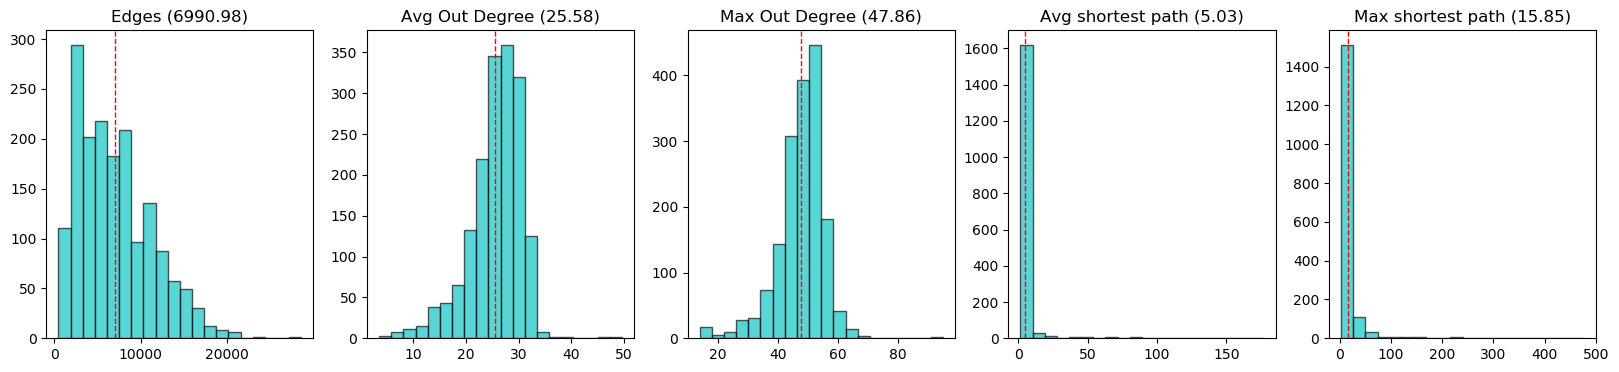

## Cutoff 14

100%|██████████| 340/340 [40:55<00:00, 18.47s/it]


,edges,avg_degree,max_degree,avg_path,max_path
count,1700.00,1700.00,1700.00,1700.00,1700.00
mean,11878.85,42.85,80.60,4.34,13.87
std,7523.10,9.82,16.91,10.65,32.71
min,542.00,4.12,17.00,1.40,3.00
25%,5384.50,38.01,71.00,2.03,5.00
50%,10484.00,44.27,84.00,2.43,6.00
75%,16294.00,49.95,93.00,3.06,9.00
max,50620.00,88.03,167.00,176.62,476.00


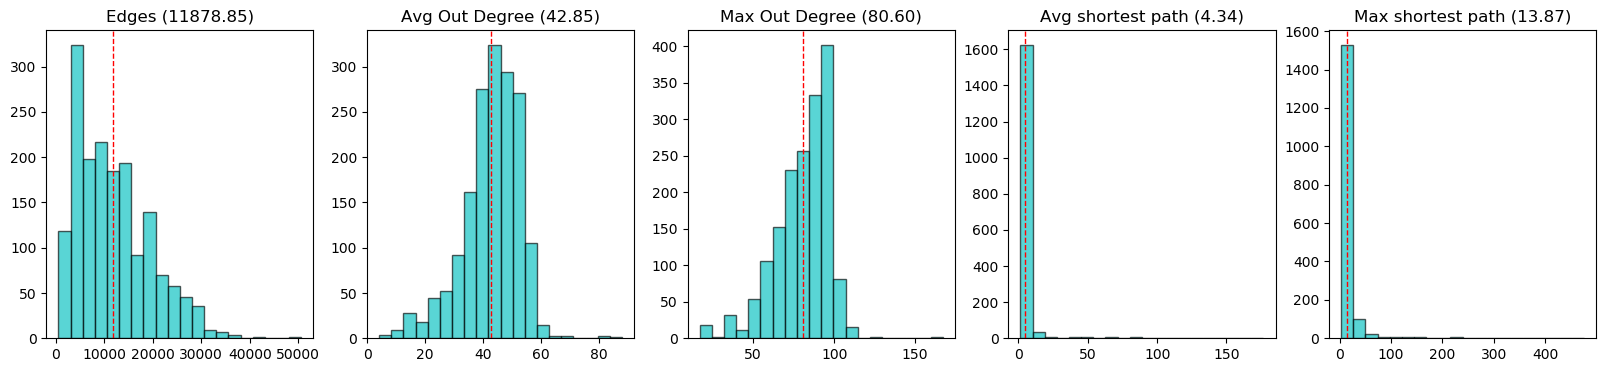

In [5]:
df_means = []
for cutoff in [0, 6, 8, 10, 12, 14]:
    display(Markdown(f'## Cutoff {cutoff}'))
    ds = ProteinQualityDataset(df_data, transforms=[RemoveEdges(cutoff)])
    dl = DataLoader(ds, batch_size=5, num_workers=4, shuffle=False, collate_fn=torchgraphs.GraphBatch.collate)

    # all_names = []
    # all_models = []
    all_edges = []
    all_avg_degrees = []
    all_max_degrees = []
    all_avg_shortest_path = []
    all_max_shortest_path = []

    for names, models, proteins, _ in tqdm(dl, leave=True):
        # all_names.append(names)
        # all_models.append(models)
        all_edges.append(proteins.num_edges_by_graph)
        all_avg_degrees.append(scatter_mean(proteins.out_degree.float(), proteins.node_index_by_graph, dim=0, dim_size=proteins.num_graphs))
        all_max_degrees.append(scatter_max(proteins.out_degree.float(), proteins.node_index_by_graph, dim=0, dim_size=proteins.num_graphs)[0])
        for p in proteins.to_networkxs():
            shortest_paths = pd.Series(itertools.chain(*(
                dest_length_dict.values() for src, dest_length_dict in nx.all_pairs_shortest_path_length(p)
            )))
            all_avg_shortest_path.append(shortest_paths.mean())
            all_max_shortest_path.append(shortest_paths.max())
            
    df = pd.DataFrame({
        # 'name': names,
        # 'model': models,
        'edges': np.concatenate(all_edges),
        'avg_degree': np.concatenate(all_avg_degrees),
        'max_degree': np.concatenate(all_max_degrees),
        'avg_path': all_avg_shortest_path,
        'max_path': all_max_shortest_path,
    })
    display(df.describe().round(2))
    
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    axes = axes.ravel()

    ax = axes[0]
    df.edges.plot.hist(ax=ax, bins=20, color='c', edgecolor='k', alpha=0.65, title=f'Edges ({df.edges.mean():.2f})')
    ax.axvline(df.edges.mean(), color='r', linestyle='dashed', linewidth=1)
    ax.yaxis.label.set_visible(False)

    ax = axes[1]
    df.avg_degree.plot.hist(ax=ax, bins=20, color='c', edgecolor='k', alpha=0.65, title=f'Avg Out Degree ({df.avg_degree.mean():.2f})')
    ax.axvline(df.avg_degree.mean(), color='r', linestyle='dashed', linewidth=1)
    ax.yaxis.label.set_visible(False)
    
    ax = axes[2]
    df.max_degree.plot.hist(ax=ax, bins=20, color='c', edgecolor='k', alpha=0.65, title=f'Max Out Degree ({df.max_degree.mean():.2f})')
    ax.axvline(df.max_degree.mean(), color='r', linestyle='dashed', linewidth=1)
    ax.yaxis.label.set_visible(False)

    ax = axes[3]
    df.avg_path.plot.hist(ax=ax, bins=20, color='c', edgecolor='k', alpha=0.65, title=f'Avg shortest path ({df.avg_path.mean():.2f})')
    ax.axvline(df.avg_path.mean(), color='r', linestyle='dashed', linewidth=1)
    ax.yaxis.label.set_visible(False)

    ax = axes[4]
    df.max_path.plot.hist(ax=ax, bins=20, color='c', edgecolor='k', alpha=0.65, title=f'Max shortest path ({df.max_path.mean():.2f})')
    ax.axvline(df.max_path.mean(), color='r', linestyle='dashed', linewidth=1)
    ax.yaxis.label.set_visible(False)
    
    display(fig)
    plt.close(fig)
    
    df_means.append({
        'cutoff': cutoff,
        'edges': df.edges.mean(),
        'avg_out_degree': df.avg_degree.mean(),
        'max_out_degree': df.max_degree.mean(),
        'avg_shortest_path': df.avg_path.mean(),
        'max_shortest_path': df.max_path.mean(),
    })

df_means = pd.DataFrame(df_means).set_index('cutoff')
df_means.to_csv('ShortestPathAndCutoff-cutoff-stats.csv')

,edges,avg_out_degree,max_out_degree,avg_shortest_path,max_shortest_path
cutoff,,,,,
0,523.388235,1.989572,2.000000,87.562968,261.694118
6,1176.064706,4.408850,9.012941,10.177213,31.397059
8,2505.091765,9.355152,17.427647,7.157237,22.077647
10,4294.611765,15.835489,29.707058,5.901991,18.429412
12,6990.975294,25.580393,47.855881,5.026895,15.850000
14,11878.849412,42.847507,80.604706,4.339673,13.869412


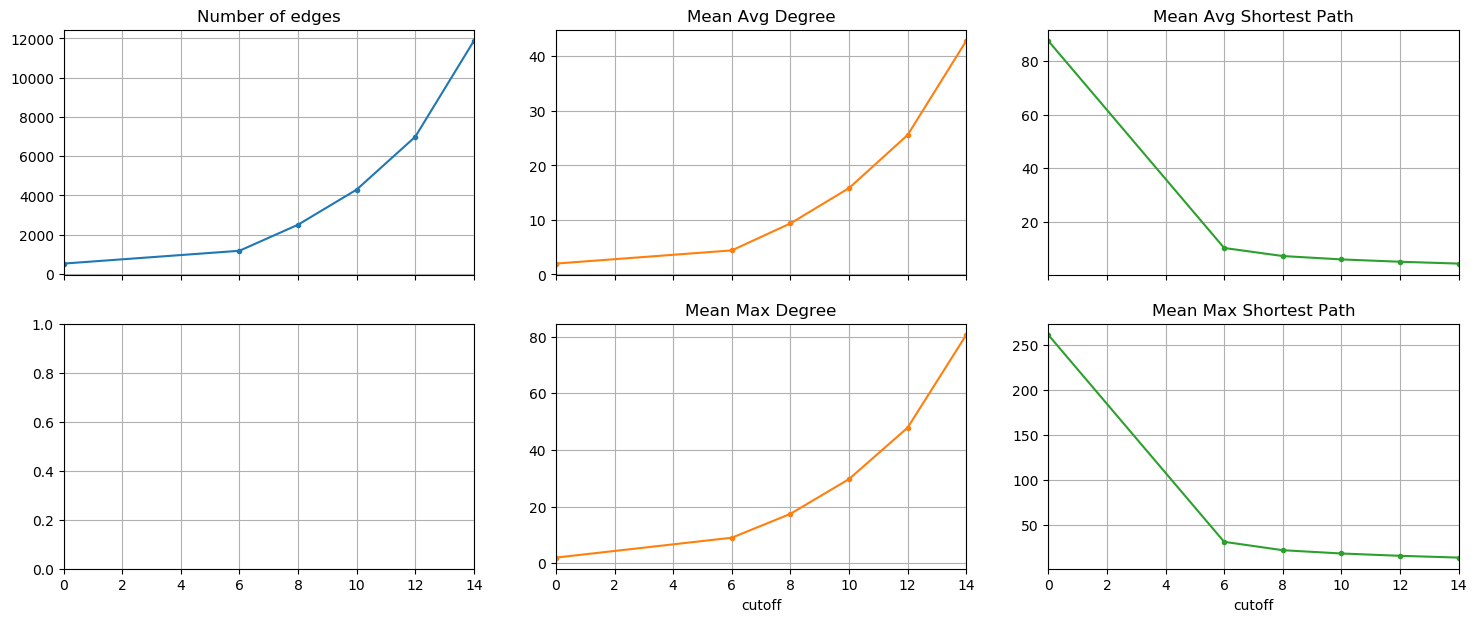

In [12]:
display(df_means)
fig, axes = plt.subplots(2, 3, figsize=(18, 7), sharex=True)

df_means.edges.plot(ax=axes[0,0], title='Number of edges', color='C0', marker='.')
df_means.avg_out_degree.plot(ax=axes[0,1], title='Mean Avg Degree', color='C1', marker='.')
df_means.max_out_degree.plot(ax=axes[1,1], title='Mean Max Degree', color='C1', marker='.')
df_means.avg_shortest_path.plot(ax=axes[0,2], title='Mean Avg Shortest Path', color='C2', marker='.')
df_means.max_shortest_path.plot(ax=axes[1,2], title='Mean Max Shortest Path', color='C2', marker='.')

for ax in axes.flat:
    ax.grid()

display(fig)
plt.close(fig)

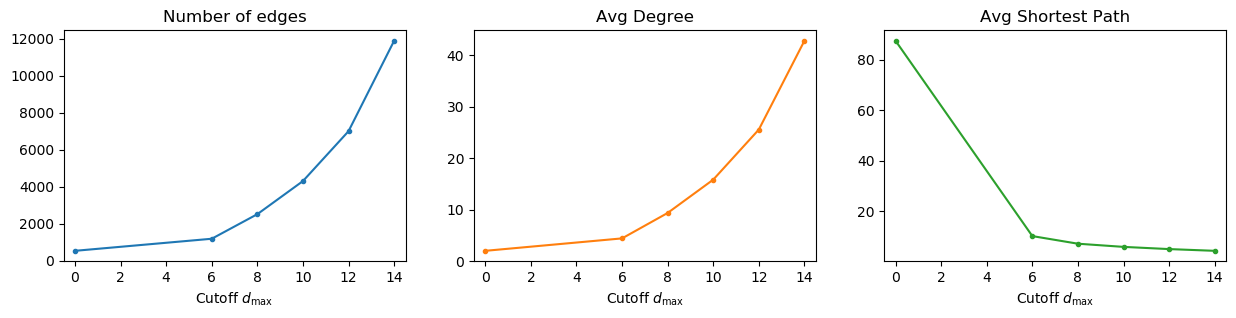

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

df_means.edges.plot(ax=axes[0], title='Number of edges', color='C0', marker='.')
df_means.avg_out_degree.plot(ax=axes[1], title='Avg Degree', color='C1', marker='.')
df_means.avg_shortest_path.plot(ax=axes[2], title='Avg Shortest Path', color='C2', marker='.')
for ax in axes.flat:
    ax.set_xlabel('Cutoff $d_\mathrm{max}$')
    ax.set_xlim((-.5,14.5))

display(fig)
fig.savefig('ShortestPathAndCutoff-cutoff-stats.pdf', bbox_inches='tight', pad_inches=0.01)
fig.savefig('ShortestPathAndCutoff-cutoff-stats.png', bbox_inches='tight', pad_inches=0.01, dpi=300)
plt.close(fig)